In [76]:
from keras.datasets.mnist import load_data
from tensorflow.keras import layers, models, losses
from keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [70]:
(trainX,trainY), (testX, testY) = load_data()

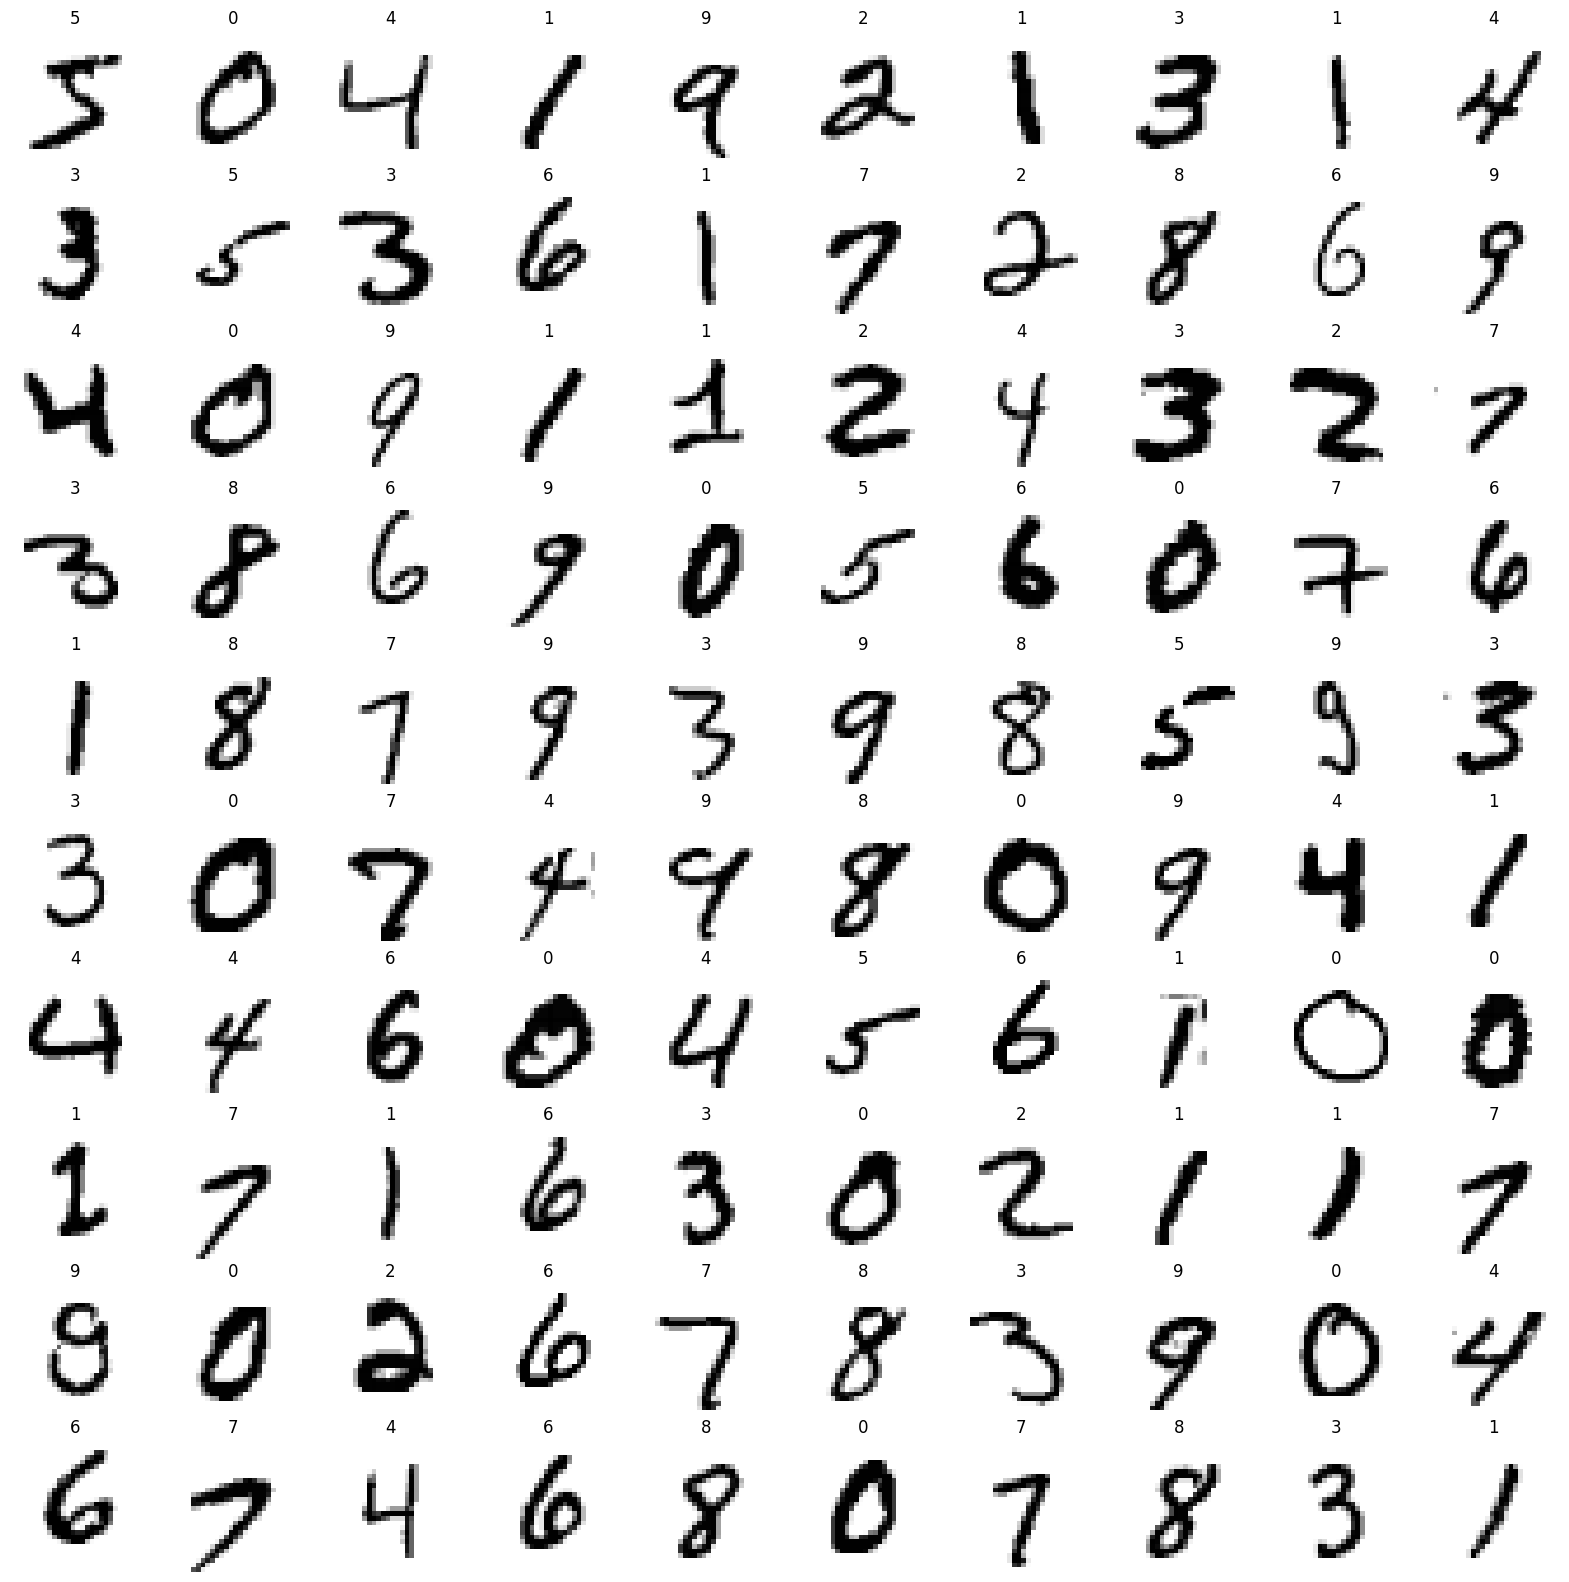

In [40]:
def plotter(nrows, ncols):
    plt.figure(figsize=(20,20))
    
    for i in range(nrows*ncols):
        plt.subplot(nrows,ncols,1+i)
        plt.axis('off')
        plt.imshow(trainX[i], cmap = 'gray_r')
        plt.title(trainY[i])
        
#     plt.subplots_adjust(wspace = 0.9, hspace = 0.9)

plotter(10,10)

In [68]:
# Składnia matematyczna
n1 = 10
n2 = 10
n3 = 100

input = layers.Input(shape = (28,28,1))
x = layers.Rescaling(1./255, input_shape=(28,28,1))(input)
input_shape = (4, 28, 28, 1) #, gdzie 4 = rozmiar batch'a (w tym przypadku ilość obrazkow branych do uczenia)
x = layers.Conv2D(filters=n1, kernel_size = (5,5), input_shape=input_shape, padding='valid')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=n2, kernel_size = (5,5), padding='valid')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(n3, activation="relu")(x)
output = layers.Dense(10, activation="softmax")(x)
model = models.Model(input, output, name="Mariusz Max Kolonko")
model.summary()

Model: "Mariusz Max Kolonko"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_43 (Conv2D)          (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 10)          2510      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 4, 4, 10)         0         
 g2D)                                          

In [79]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(trainX, to_categorical(trainY, num_classes=10), epochs=10, 
                    validation_data=(testX, to_categorical(testY, num_classes=10)))

Epoch 1/10
1875/1875 [==============================] - 223s 119ms/step - loss: 0.2076 - accuracy: 0.9371 - val_loss: 0.0697 - val_accuracy: 0.9784
Epoch 2/10
1875/1875 [==============================] - 224s 119ms/step - loss: 0.0749 - accuracy: 0.9763 - val_loss: 0.0522 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 212s 113ms/step - loss: 0.0532 - accuracy: 0.9827 - val_loss: 0.0526 - val_accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 220s 117ms/step - loss: 0.0422 - accuracy: 0.9863 - val_loss: 0.0412 - val_accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 200s 107ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0489 - val_accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 216s 115ms/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0515 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 217s 116ms/step - loss: 0.0262 - accuracy: 0.9920 - val_

In [82]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
